# Lab 4: Evaluation and Multi-Layer Perceptron 

Group Members: Christina DeSantiago, Estefy Fiallos, Kaiying Li, Tianyu Li

In this lab, you will compare the performance of multi-layer perceptrons programmed in scikit-learn and via your own implementation. 

Select a dataset identically to the way you selected for lab one or lab three (table data or image data). You are not required to use the same dataset that you used in the past, but you are encouraged. You must identify a classification task from the dataset that contains three or more classes to predict. That is, it cannot be a binary classification; it must be multi-class prediction. 

# Preparation

**[5 points] (mostly the same processes as from previous lab) Explain the task and what business-case or use-case it is designed to solve (or designed to investigate). Detail exactly what the task is and what parties would be interested in the results. How well would your prediction algorithm need to perform to be considered useful by interested parties?**

For this lab, we chose the same dataset as lab one: Ames Housing Data. Our task is to classify houses into one of three price ranges based on the various attributes of the property (# of bedrooms, square footage, year built, etc). Our price ranges are labeled as 0, 1, 2 to represent a low, medium, and high price.

For the buyers, it will be convenient for them to narrow down the house choices within their budget range by selecting the number of bedrooms and bathrooms, garage types and other features when they are in the house market.

On the other hand, for sellers such as real estate or construction company, it is crucial to understand which type of houses or floor plan are more desirable in the market. Predicting the sales prices of different type of houses not only helps them optimize their asset acquisition or construction plan, it also leads to quicker asset turn over and smooth sales process. Ultimately a greater profit is achieved. It would also be important for a real estate company to predict the price range of a house specifically for meeting quotas. Sales representatives often have quotas to meet each business quarter for their sales. Understanding the predicted price range of a property will allow a sales rep to push more towards certain kinds of properties in order to meet these quotas. Sellers can use our algorithm as a guide to price their properties. 

There are two possible types of misclassification in our dataset - one is between adjacent categories (low, medium and medium, high) and the other is between low and high sales price categories. Our algorithm would not be useful for realtors if there are any misclassifications between lowest and highest priced houses. This would not only show that the algorithm does not work but could also lead to a significant loss of revenue for the seller. There is a little more room for error for houses that might be on the borderline between price ranges. Zillow uses Zestimates to predict house prices. According to https://www.zillow.com/zestimate/, the Zestimate was within 20% of the transaction price for 87.6% of properties across the U.S. Using this number as a rough guideline, we can estimate that the algorithm would still be useful with about a 10% misclassification rate for houses that are on the borderline between price ranges.  

**[10 points] (mostly the same processes as from lab one) Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification (include a description of any newly formed variables you created).**

We used our same dataset from lab one with a subset of 8 attributes: Gr Liv Area = Above ground living area (continuous), SalePrice = Sales price in dollars (continuous), Year built (discrete), Full Bath = number of full bathrooms (discrete), Bedroom AbvGr = number of bedrooms above ground (discrete), Garage Type (nominal), Lot frontage (continuous), Lot Area (continuous).

We changed the Garage Type variable to be one-hot encoded, creating 7 new dummy variables for our data set. We used the same method of imputing missing values in Lot Frontage based on Lot Area. We also transformed our SalePrice variable into a Price_Range variable. Instead of having a continuous response variable, we now have a categorical response with 3 different levels of pricing so we can use multi level classification. We used the distribution of SalePrice, which we investigated in lab one, to determine how to split the prices into ranges. A house with sale price less than 130,000 dollars is assigned to the lowest price range "0" and houses with sale price above 210,000 dollars are assigned to the highest price range "2". We also used MinMax Scaler to normalize our data.

Our final data sets has are: X, with 14 predictors (7 dummy variables for Garage Type + 7 previously defined variables) and y, with 1 target variable.


In [0]:
#import data set
import pandas as pd
df2=pd.read_csv("https://raw.githubusercontent.com/skytianyuli/MLPython/master/ames.csv", sep=",")

#make a subset of the dataset only with the variables we are interested in
to_keep=['Lot.Frontage','Lot.Area','Year.Built', 'Gr.Liv.Area','Full.Bath', 'Bedroom.AbvGr','Garage.Type', 'SalePrice']
sub = df2[to_keep].copy()

sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 8 columns):
Lot.Frontage     2440 non-null float64
Lot.Area         2930 non-null int64
Year.Built       2930 non-null int64
Gr.Liv.Area      2930 non-null int64
Full.Bath        2930 non-null int64
Bedroom.AbvGr    2930 non-null int64
Garage.Type      2773 non-null object
SalePrice        2930 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 183.2+ KB


In [0]:
#Change NA values in 'Garage Type' to No_Garage (since NA is described as no garage in data documentation)
sub['Garage.Type'].fillna(value='No_Garage', inplace= True)
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 8 columns):
Lot.Frontage     2440 non-null float64
Lot.Area         2930 non-null int64
Year.Built       2930 non-null int64
Gr.Liv.Area      2930 non-null int64
Full.Bath        2930 non-null int64
Bedroom.AbvGr    2930 non-null int64
Garage.Type      2930 non-null object
SalePrice        2930 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 183.2+ KB


In [0]:
#one hot encoding for the Garage Type variable
tmp = pd.get_dummies(sub['Garage.Type'])
result = pd.concat([sub, tmp],axis=1, join_axes=[sub.index])
del result['Garage.Type'] #delete since we have the dummy variables now
result.head()

,Lot.Frontage,Lot.Area,Year.Built,Gr.Liv.Area,Full.Bath,Bedroom.AbvGr,SalePrice,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,No_Garage
0,141.0,31770,1960,1656,1,3,215000,0,1,0,0,0,0,0
1,80.0,11622,1961,896,1,2,105000,0,1,0,0,0,0,0
2,81.0,14267,1958,1329,1,3,172000,0,1,0,0,0,0,0
3,93.0,11160,1968,2110,2,3,244000,0,1,0,0,0,0,0
4,74.0,13830,1997,1629,2,3,189900,0,1,0,0,0,0,0


In [0]:
#Imputation of Lot Frontage
#Breaking up 'Lot Area' into intervals
result['Lot_Area_Ranges']= pd.cut(result['Lot.Area'], [0, 10000, 20000, 30000, 250000])

result_grouped = result.groupby(by=['Lot_Area_Ranges'])

#Fill missing values with mean within 'Lot Area' intervals
func = lambda grp: grp.fillna(grp.mean())
result_imputed= result_grouped.transform(func)

# fill any deleted columns
col_deleted = list( set(result.columns) - set(result_imputed.columns)) # in case the mean operation deleted columns
result_imputed[col_deleted] = result[col_deleted]

result_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 15 columns):
Lot.Frontage       2930 non-null float64
Lot.Area           2930 non-null int64
Year.Built         2930 non-null int64
Gr.Liv.Area        2930 non-null int64
Full.Bath          2930 non-null int64
Bedroom.AbvGr      2930 non-null int64
SalePrice          2930 non-null int64
2Types             2930 non-null uint8
Attchd             2930 non-null uint8
Basment            2930 non-null uint8
BuiltIn            2930 non-null uint8
CarPort            2930 non-null uint8
Detchd             2930 non-null uint8
No_Garage          2930 non-null uint8
Lot_Area_Ranges    2930 non-null category
dtypes: category(1), float64(1), int64(6), uint8(7)
memory usage: 183.3 KB


In [0]:
#get rid of the "Lot Area Range" variable because we don't need it in prediction model
result=result_imputed.copy()
del result['Lot_Area_Ranges']


In [0]:
#Break Sales price into 3 classes for prediction
result['Price_Range']=pd.cut(result["SalePrice"], [0,130000,210000,800000],labels=[0,1,2])
#0=low, 1=mid, 2= high
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 15 columns):
Lot.Frontage     2930 non-null float64
Lot.Area         2930 non-null int64
Year.Built       2930 non-null int64
Gr.Liv.Area      2930 non-null int64
Full.Bath        2930 non-null int64
Bedroom.AbvGr    2930 non-null int64
SalePrice        2930 non-null int64
2Types           2930 non-null uint8
Attchd           2930 non-null uint8
Basment          2930 non-null uint8
BuiltIn          2930 non-null uint8
CarPort          2930 non-null uint8
Detchd           2930 non-null uint8
No_Garage        2930 non-null uint8
Price_Range      2930 non-null category
dtypes: category(1), float64(1), int64(6), uint8(7)
memory usage: 183.3 KB


Text(0.5,1,'Distribution of Price Range')

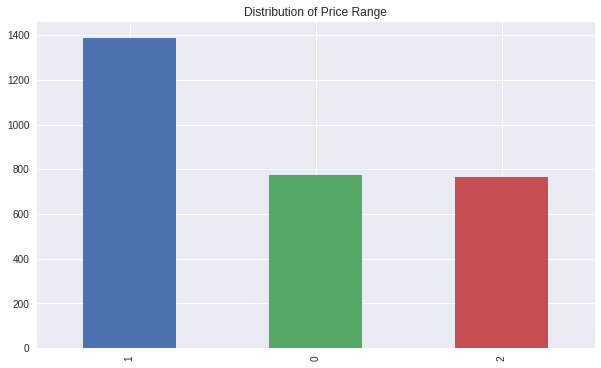

In [0]:
#visualize Price Range with bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
result['Price_Range'].value_counts().plot(kind='bar')
plt.title('Distribution of Price Range')

In [0]:
df=result.copy()
del df['SalePrice']
# we want to predict the X and y data as follows:
if 'Price_Range' in df:
    y = df['Price_Range'].values # get the labels we want
    del df['Price_Range'] # get rid of the class label
    X = df.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn


In [0]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=False)
scaler.fit(X)
scaler.transform(X)


array([[0.4109589 , 0.14241978, 0.63768116, ..., 0.        , 0.        ,
        0.        ],
       [0.20205479, 0.04824604, 0.64492754, ..., 0.        , 0.        ,
        0.        ],
       [0.20547945, 0.06060904, 0.62318841, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14041096, 0.04272593, 0.86956522, ..., 0.        , 0.        ,
        1.        ],
       [0.19178082, 0.0407114 , 0.73913043, ..., 0.        , 0.        ,
        0.        ],
       [0.18150685, 0.03892122, 0.87681159, ..., 0.        , 0.        ,
        0.        ]])

# Evaluation

**[15 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s generalization performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why does the metric evaluate performance in terms of the business case you argued for. Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.**

We will use a cost matrix as our evaluation method because we want to consider how different types of misclassifications will affect business from a seller's standpoint.

If we classify a house as lower priced than it actually is, sellers would lose revenue when selling the house. If we classify a house as higher priced than it is, there would be less demand from buyers because the sales price is out of budget. This would ultimately would lead to loss of revenue for the seller because it would take longer to sell the house. This uses up the seller's time and resources while this time could have been spent selling an additional property. 

We chose to use different weights for the cost because misclassification between the lowest and highest price ranges would be worse than misclassifying houses that might be in the bordeline between price ranges. To choose the costs, we calculated the difference between median sales price for each pair of price range categories to have an estimate of how much the misclassification would cost the seller. Then, we set the misclassification between lowest and highest price ranges (0 and 2) to be 100 and normalized the other price differences to this. The resulting cost matrix is depicted below. 


In [0]:
#determine values to use in cost matrix
df2 = result.groupby(['Price_Range']).median()

diff01 = df2.SalePrice[1] - df2.SalePrice[0] 

diff02 = df2.SalePrice[2] - df2.SalePrice[0]

diff12 = df2.SalePrice[2] - df2.SalePrice[1]

print(diff01, diff12, diff02)

C02 = 100 #Setting the difference between highest and lowest price (diff02) to be 100
C01 = diff01*100/diff02
C12 = diff12*100/diff02

print(C01, C12, C02)


48500.0 100364.5 148864.5
32.579963658226106 67.4200363417739 100


In [0]:
#creating custom cost matrix
import numpy as np
cost_mat = np.matrix([[0,33,100],
            [33,0,67],
            [100,67,0]])
print(cost_mat)

[[  0  33 100]
 [ 33   0  67]
 [100  67   0]]


The cost matrix above is how we will evaluate the performance of our model in conjunction with the confusion matrix.  

**[15 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time. Convince the reader that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.** 

**Important: You should use your chosen evaluation criteria and chosen method for dividing train/test data throughout the report. For example, arguing that f-score is the best evaluation method, but then using accuracy in a grid search will be regarded as a conceptual error and graded accordingly.**

We will use Stratified k fold cross validation for our data set. Stratified k fold aims to create folds that are representative of all classes in the data. Since we have slight class imbalance in our data set, (50% - class 1,  25% - class 0, 25% -  class 2), it is best to use stratified k fold to ensure all training folds contain accurate representation of each class. Also, statified k fold works well on small/medium data sets. With only 2930 observations in our set, it is appropriate to use stratified k fold in this case.

We will also further split the training set to attain a validation data set to use for hyperparameter tuning (shown under "Tuning parameters")

In [0]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
skf = StratifiedKFold(n_splits=10,random_state=1)
skf.get_n_splits(X, y)

print(skf)  
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [0]:
X_train.shape

(2639, 13)

In [0]:
X_test.shape

(291, 13)

# Modeling

All modeling code must be written using only the instructor's template code. Do NOT copy this implementation form anywhere online. Not fully implementing the back propagation algorithm will result in a zero for the entire assignment.

**[20 points] Create a custom implementation of the multi-layer perceptron. Start with the implementation given to you in the course. Update the MLP class to:
When instantiated, use a selectable phi function for the initial layer: either sigmoid or linear 
Use a selectable cost function when instantiated: either quadratic or cross entropy
Add support for any number of hidden layers (user customizable).**

In [0]:
import numpy as np
from scipy.special import expit
import pandas as pd
import sys
from sklearn.metrics import accuracy_score


#phif can be "sigmoid" or "linear"
#costf can be "q" for quadratic or "c" for cross entropy
#specify number of hidden layers in n_layer

class MultLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, phif="sigmoid", costf="q",n_layer=2,random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.phif = phif
        self.costf = costf
        self.n_layer = n_layer
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot
    
    
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W=[]
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        W.append(W1)
        
        for i in range(1,self.n_layer-1):          
          W_num_elems = (self.n_hidden + 1)*self.n_hidden
          Wi = np.random.uniform(-1.0, 1.0,size=W_num_elems)
          Wi = Wi.reshape(self.n_hidden, self.n_hidden + 1) # reshape to be W
          W.append(Wi)          
        
        WOUT_num_elems = (self.n_hidden + 1)*self.n_output_
        WOUT = np.random.uniform(-1.0, 1.0, size=WOUT_num_elems)
        WOUT = WOUT.reshape(self.n_output_, self.n_hidden + 1)
        W.append(WOUT)
        return W
    
    #define custom phi function  
    def _phi(self,z):
        if self.phif == "linear":
          return(z)
        return expit(z)   #default is the sigmoid
      
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        s=[]
        for i in range(0,len(W)):
          s.append(np.mean(W[i][:, 1:] ** 2))
          result= (lambda_/2.0) * np.sqrt(np.sum(s))
        return result
    
    #define custom cost function. Default is the quadratic
    def _cost(self,AOUT,Y_enc,W):
        '''Get the objective function value'''
        #quadratic
        if self.costf == "q":
          cost = np.mean((Y_enc-AOUT)**2)
        #cross entropy
        elif self.costf == "c":
          cost = -np.mean(np.nan_to_num((Y_enc*np.log(AOUT)+(1-Y_enc)*np.log(1-AOUT))))
        
        L2_term = self._L2_reg(self.l2_C, W)
        return cost + L2_term
      
      
    
    def _feedforward(self, X, W):
        """Compute feedforward step
        """
        A=[]
        Z=[]
        A0 = self._add_bias_unit(X, how='column')
        A0 = A0.T
        A.append(A0)
        Z0 = W[0] @ A0
        Z.append(Z0)
        
        A1 = self._phi(Z0)   #customized phi function only for the first layer
        A1 = self._add_bias_unit(A1, how='row')
        Z1 = W[1] @ A1
        A.append(A1)
        Z.append(Z1)
        
        for i in range(2,self.n_layer):
          Ai = self._sigmoid(Z[-1])          
          Ai = self._add_bias_unit(Ai, how='row')
          Zi = W[i] @ Ai
          A.append(Ai)
          Z.append(Zi)

        AOUT = self._sigmoid(Z[-1])
        A.append(AOUT)
        return A, Z, AOUT
    
    def _get_gradient(self, A, Z, AOUT, Y_enc, W):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V=[0]*self.n_layer
        if self.costf == "q":
          V[-1] = -2*(Y_enc-AOUT)*AOUT*(1-AOUT)  # last layer sensitivity
        elif self.costf == "c":
          V[-1] = (AOUT-Y_enc)
        
        #all other sensitivities
        V[-2]=A[-2]*(1-A[-2])*(W[-1].T @ V[-1])
        for i in range(self.n_layer-3,-1,-1):
          V[i] = A[i+1]*(1-A[i+1])*(W[i+1].T @ V[i+1][1:,:])
        
        #first sensitivity is different for linear activation function
        if self.phif == "linear":
          if self.n_layer >2:
            V[0]=(W[1].T @ V[1][1:,:])
          else:
            V[0]=(W[1].T @ V[1])
          #if equals 2 then don't take off bias
        
        grads = [0]*len(V)
        grads[0] = V[0][1:,:] @ A[0].T
        for i in range(1,len(V)-1):
          grads[i] = V[i][1:,:] @ A[i].T
        grads[-1] = V[-1] @ A[-2].T

        for k in range(0,self.n_layer):
          grads[k][:, 1:] += W[k][:, 1:] * self.l2_C 
        
        return grads
    
    def predict(self, X):
        """Predict class labels"""
        _, _, AOUT = self._feedforward(X, self.W)
        y_pred = np.argmax(AOUT, axis=0)
        return y_pred

In [0]:
class MLPMiniBatch(MultLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W = self._initialize_weights()
        
        # initialize grad_w_
        self.grad_w_ = np.zeros(shape=(self.epochs,self.n_layer))

        delta_W_prev=[]
        for j in range(0,self.n_layer):
          delta_Wj_prev = np.zeros(self.W[j].shape)
          delta_W_prev.append(delta_Wj_prev)
       

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A, Z, AOUT = self._feedforward(X_data[idx],
                                         self.W)
                
                cost = self._cost(AOUT,Y_enc[:, idx],self.W)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grads = self._get_gradient(A,Z,AOUT,
                                          Y_enc=Y_enc[:, idx],
                                          W=self.W)
                
                # get magnitude of gradients
                for m in range(0,self.n_layer):
                  self.grad_w_[i][m]=np.mean(np.abs(grads[m]))

                # momentum calculations
                delta_W=[]
                for k in range(0,self.n_layer):
                  delta_Wk = self.eta * grads[k]
                  delta_W.append(delta_Wk)
                  self.W[k] -= (delta_W[k] + (self.alpha * delta_W_prev[k]))
                delta_W_prev = delta_W

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
        return self
    

In [0]:
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              n_layer=3,
              random_state=1)

In [0]:
#testing if our classifier runs correctly
from sklearn.metrics import confusion_matrix

nn = MLPMiniBatch(**params, phif='linear')
nn.fit(X_train, y_train, print_progress=50)
yhat=nn.predict(X_test)

confusion_matrix(y_test,yhat)

Epoch: 200/200

array([[53, 21,  3],
       [23, 60, 55],
       [ 1,  9, 66]])

## Tuning parameters

**[15 points] Tune the hyper-parameters of your MLP model (phi function, objective function, and number of layers). While tuning hyper-parameters, analyze the results using your chosen metric(s) of evaluation. Visualize the evaluation metric(s) versus the hyper-parameters. Conclude what combination of parameters are best.**

In [0]:
#using cv to compare performance of different cost and activation functions
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

#use stratified k fold to split into training and validation set
skf = StratifiedKFold(n_splits=10, random_state=1)
skf.get_n_splits(X_train, y_train)
print(skf)  

mod_1=MLPMiniBatch(costf="q", phif="sigmoid", n_layer=3)
mod_2=MLPMiniBatch(costf="q", phif="linear", n_layer=3)
mod_3=MLPMiniBatch(costf="c", phif="sigmoid", n_layer=3)
mod_4=MLPMiniBatch(costf="c", phif="linear", n_layer=3)

models = [mod_1, mod_2, mod_3, mod_4]
score_mat=[]

for train_index, test_index in skf.split(X_train, y_train):
    X_trainnew, X_valid = X_train[train_index], X_train[test_index]
    y_trainnew, y_valid = y_train[train_index], y_train[test_index]
    #need to fit
    score=[]
    for i in range(0,4):
      models[i].fit(X_trainnew,y_trainnew)
    #need to predict
      yhat_i=models[i].predict(X_valid)
    #evaluate model  
      score_i=confusion_matrix(y_valid,yhat_i)
      cost_i=score_i * cost_mat
      score.append(np.sum(cost_i))
    #keep track of overall costs for all models per fold
    score_mat.append(score)


StratifiedKFold(n_splits=10, random_state=1, shuffle=False)


In [0]:
print(X_trainnew.shape)
print(X_valid.shape)

(2376, 13)
(263, 13)


In [0]:
print(score_mat)

[[34217, 31014, 33607, 33603], [30829, 35835, 36307, 31730], [33338, 33472, 33373, 30129], [30185, 35056, 31995, 35257], [34453, 34415, 32050, 30509], [30738, 33705, 31970, 34122], [36108, 31965, 36409, 35656], [31436, 33140, 33109, 32774], [30018, 31085, 30651, 35558], [31154, 32020, 34157, 34354]]


In [0]:
#re-format overall costs into a matrix
scores=np.zeros(shape=(10,4))
for k in range(0,10):
  for m in range(0,4):
    scores[k,m]=score_mat[k][m]
print(scores)

[[34217. 31014. 33607. 33603.]
 [30829. 35835. 36307. 31730.]
 [33338. 33472. 33373. 30129.]
 [30185. 35056. 31995. 35257.]
 [34453. 34415. 32050. 30509.]
 [30738. 33705. 31970. 34122.]
 [36108. 31965. 36409. 35656.]
 [31436. 33140. 33109. 32774.]
 [30018. 31085. 30651. 35558.]
 [31154. 32020. 34157. 34354.]]


In [0]:
#compare mean cost per model
np.mean(scores,0)

array([32247.6, 33170.7, 33362.8, 33369.2])

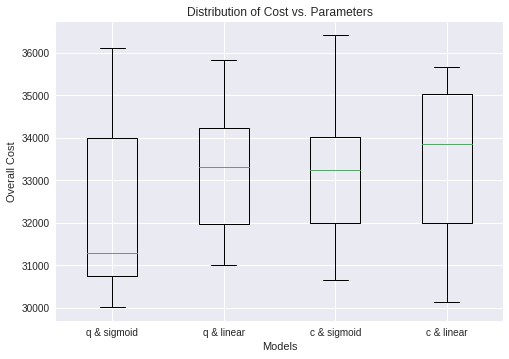

In [0]:
#visualize difference in performance
plt.boxplot(scores)
plt.xticks([1, 2, 3, 4], ['q & sigmoid', 'q & linear', 'c & sigmoid','c & linear'])
plt.title("Distribution of Cost vs. Parameters")
plt.ylabel("Overall Cost")
plt.xlabel("Models")
plt.show()

To begin tuning our parameters, we used stratified 10-fold cross validation and performed a grid search with all combinations of cost and activation functions used in the models. Within each fold, we used the confusion matrix and our chosen cost matrix to evaluate the performance of the models. The boxplot above shows similar performance for all the models. The lowest mean cost of ~32,000 was attained with the quadratic cost function and sigmoid activation function.  

As stated earlier, we can estimate that the algorithm would still be useful with about a 10% misclassification rate for houses that are on the borderline between price ranges. With 263 observations in our validation set, this means we could incorrectly classify at most 26 properties. We do not want any these errors to occur in the upper right or lower left corners of the confusion matrix. If all errors occured at a position between the lowest and middle price range, overall cost would be (26 x 33 = 858). If all errors occured at a position between the middle and highest price range, overall cost would be (26 x 67 = 1,742). When evaluating our model on the validation dataset, any overall cost below ~1700 would be acceptable. However, we see that all models perform with costs between 30,000 and 37,000. 

In [0]:
#we use StratifiedKFold cross validation to tune the parameter n_layer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
skf = StratifiedKFold(n_splits=10, random_state=1)
skf.get_n_splits(X_train, y_train)
layer=range(2,11,1)
print(skf) 

models=[]
for i in range(len(layer)):
  mod = MLPMiniBatch(phif="sigmoid",costf="q", n_layer=layer[i])
  models.append(mod)


score_mat=[]
for train_index, test_index in skf.split(X_train, y_train):
    X_trainnew, X_valid = X_train[train_index], X_train[test_index]
    y_trainnew, y_valid = y_train[train_index], y_train[test_index]
    #need to fit
    score=[]
    for i in range(0,9):
      
      models[i].fit(X_trainnew,y_trainnew)

    #need to predict
      yhat_i=models[i].predict(X_valid)
    #evaluate model  
      score_i=confusion_matrix(y_valid, yhat_i)
      cost_i=score_i * cost_mat
      score.append(np.sum(cost_i))
    #keep track of overall costs per # of layers
    score_mat.append(score)

StratifiedKFold(n_splits=10, random_state=1, shuffle=False)


In [0]:
#re-format overall costs into a matrix
scores_layer=np.zeros(shape=(10,9))
for k in range(0,10):
  for m in range(0,9):
    scores_layer[k,m]=score_mat[k][m]
print(scores_layer)

[[35071. 34183. 34353. 30742. 31111. 30608. 33423. 26500. 29305.]
 [37030. 36674. 31463. 31530. 37077. 37345. 37823. 29734. 26400.]
 [31481. 33635. 33472. 31069. 33674. 34541. 29700. 34222. 26400.]
 [35849. 30217. 35733. 30647. 35800. 32192. 38929. 27720. 28809.]
 [30925. 30383. 34388. 30715. 31584. 35392. 36373. 29640. 33340.]
 [34961. 33873. 34106. 34239. 34872. 34937. 35498. 36450. 31581.]
 [30871. 36541. 36677. 37012. 32102. 37244. 28281. 29545. 28017.]
 [30748. 31404. 31733. 31732. 34042. 33995. 32077. 29898. 29766.]
 [35446. 34688. 34924. 34993. 35392. 32353. 29575. 34304. 26300.]
 [35013. 31420. 31384. 31952. 35093. 34747. 35447. 26300. 26300.]]


In [0]:
np.mean(scores_layer,0)

array([33739.5, 33301.8, 33823.3, 32463.1, 34074.7, 34335.4, 33712.6,
       30431.3, 28621.8])

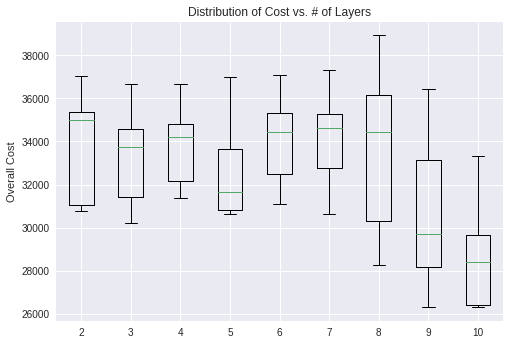

In [0]:
#visualize performance for different number of layers
plt.boxplot(scores_layer)
plt.xticks(range(1,10), range(2,11))
plt.title("Distribution of Cost vs. # of Layers")
plt.ylabel("Overall Cost")
plt.show()

We repeated the same process to tune the number of layers to use in our model with quadratic cost function and sigmoid activation function. We believe that using 5 layers is the best choice because it has the lowest mean overall cost for layers 1-8. The mean overall cost was 32,463 which was third lowest cost for all models tested. Although the overall cost was the lowest for 10 layers, we thought that using this many layers might lead to overtraining the model and could also cause issues with either vanishing or exploding gradients. 

After tuning our parameters, we believe that the "best" combination is to use a neural network with sigmoid activation function, quadratic cost function, and 5 total layers.

In [0]:
#Evaluate final model on test set

nn = MLPMiniBatch(phif="sigmoid",costf="q", n_layer=5)
nn.fit(X_train, y_train, print_progress=50)
yhat=nn.predict(X_test)

score=confusion_matrix(y_test,yhat)
score

Epoch: 500/500

array([[41, 36,  0],
       [15, 83, 40],
       [ 0, 15, 61]])

In [0]:
cost=score * cost_mat
np.sum(cost)

37915

Our final model was successful in not misclassifying any properties between lowest and highest price range. The testing data contains 291 observations. If allowing for 10% misclassification rate, we could at most misclassify 29 houses. The highest acceptable cost would be (29 x 67) 1,943. The cost of misclassification for the final model was 37,915, so, we would not recommend this model for deployment since it's not likely to be useful for realtors. 

**[10 points] Visualize the magnitude of the gradients in each layer of the neural network versus the training iteration. Do the gradients stay consistent in each layer?**

---



In [0]:
#save magnitude of gradients
grad=nn.grad_w_

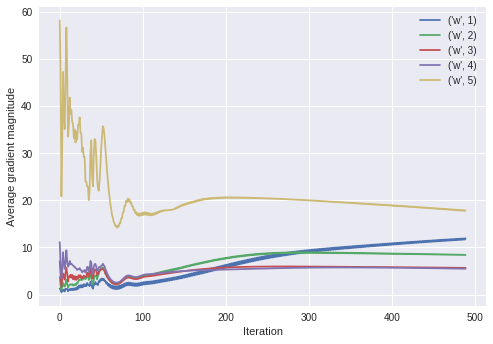

In [0]:
#visualize magnitude of gradients
ax = plt.subplot(1,1,1)
for i in range(len(grad[0,:])):
  plt.plot(abs(grad[10:,i]), label=("w",i+1))
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

No, the gradients do not stay consistent in each layer. We visualized the gradients for 5 layers, and we see that they are all have different magnitudes. The gradients begin to stabilize around 200 iterations. It appears that after 300 iterations, the lower weights (W1 and W2) are being updated by the higher order weights.

# Exceptional Work

You have free reign to provide additional analyses.
One idea (required for 7000 level students):  Implement two more phi functions: ReLU and SiLU (also called Swish). Compare their performance to the linear and sigmoid phi functions. 

In [0]:
##adapted for using relu and silu
import numpy as np
from scipy.special import expit
import pandas as pd
import sys
from sklearn.metrics import accuracy_score


#phif can be "sigmoid" , "linear", "relu", or "silu"
#costf can be "q" for quadratic or "c" for cross entropy
class MultLayerPerceptronBase2(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, phif="sigmoid", costf="q",n_layer=2,random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.phif = phif
        self.costf = costf
        self.n_layer = n_layer
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot
    
    
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W=[]
        if self.phif != ("relu" or "silu"):
          W1_num_elems = (self.n_features_ + 1)*self.n_hidden
          W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
          W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
          W.append(W1)
        
          for i in range(1,self.n_layer-1):          
            W_num_elems = (self.n_hidden + 1)*self.n_hidden
            Wi = np.random.uniform(-1.0, 1.0,size=W_num_elems)
            Wi = Wi.reshape(self.n_hidden, self.n_hidden + 1) # reshape to be W
            W.append(Wi)          
        
          WOUT_num_elems = (self.n_hidden + 1)*self.n_output_
          WOUT = np.random.uniform(-1.0, 1.0, size=WOUT_num_elems)
          WOUT = WOUT.reshape(self.n_output_, self.n_hidden + 1)
          W.append(WOUT)
        #initialize different weights for relu and silu        
        else:
          init_bound = np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
          W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
          W1[:,:1] = 0
          W.append(W1)
          
          for i in range(1,self.n_layer-1):          
            init_bound = np.sqrt(6. / (self.n_hidden + self.n_hidden +1))
            Wi = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden+ 1))
            Wi[:,:1] = 0
            W.append(Wi)
          
          init_bound = np.sqrt(0.5 / (self.n_output_ + self.n_hidden + 1))
          WOUT = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden +1))
          WOUT[:,:1] = 0
          W.append(WOUT)
          
        return W
    
    #define custom phi function  
    def _phi(self,z):
        if self.phif == "linear":
          return(z)
        elif self.phif == "relu":
          return np.maximum(0,z.copy())
        elif self.phif == "silu":
          return (z * expit(z))
        return expit(z)   #default is the sigmoid
      
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.ex
        #p(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        s=[]
        for i in range(0,len(W)):
          s.append(np.mean(W[i][:, 1:] ** 2))
          result= (lambda_/2.0) * np.sqrt(np.sum(s))
        return result
    
    #define custom cost function. Default is the quadratic
    def _cost(self,AOUT,Y_enc,W):
        '''Get the objective function value'''
        #quadratic
        if self.costf == "q":
          cost = np.mean((Y_enc-AOUT)**2)
        #cross entropy
        elif self.costf == "c":
          cost = -np.mean(np.nan_to_num((Y_enc*np.log(AOUT)+(1-Y_enc)*np.log(1-AOUT))))
        
        L2_term = self._L2_reg(self.l2_C, W)
        return cost + L2_term
      
      
    
    def _feedforward(self, X, W):
        """Compute feedforward step
        """
        A=[]
        Z=[]

        
        A0 = self._add_bias_unit(X, how='column')
        A0 = A0.T
      
        A.append(A0)
        Z0 = W[0] @ A0
        Z.append(Z0)
        
        A1 = self._phi(Z0)   #customized phi function only for the first layer
        A1 = self._add_bias_unit(A1, how='row')
        Z1 = W[1] @ A1
        A.append(A1)
        Z.append(Z1)
        
        for i in range(2,self.n_layer):
          Ai = self._sigmoid(Z[-1])          
          Ai = self._add_bias_unit(Ai, how='row')
          Zi = W[i] @ Ai
          A.append(Ai)
          Z.append(Zi)

        AOUT = self._sigmoid(Z[-1])
        A.append(AOUT)
       
        return A, Z, AOUT
    
    def _get_gradient(self, A, Z, AOUT, Y_enc, W):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V=[0]*self.n_layer
        if self.costf == "q":
          V[-1] = -2*(Y_enc-AOUT)*AOUT*(1-AOUT)  # last layer sensitivity
        elif self.costf == "c":
          V[-1] = (AOUT-Y_enc)
          
        #fill in all other sensitivities  
        V[-2]=A[-2]*(1-A[-2])*(W[-1].T @ V[-1])
        for i in range(self.n_layer-3,-1,-1):
          V[i] = A[i+1]*(1-A[i+1])*(W[i+1].T @ V[i+1][1:,:])
        
        #first sensitivity will be different depending on phi function used
        if self.phif == "relu":
          Z_bias= self._add_bias_unit(Z[0], how='row')
          if self.n_layer>2:
            V[0] = (W[1].T @ V[1][1:,:])
          else:
            V[0]=(W[1].T @ V[1])
          V[0][Z_bias<=0] = 0
            
            
        elif self.phif == "silu":
          if self.n_layer>2:
            V[0] = (A[1]+(expit(self._add_bias_unit(Z[1], how='row'))*(1-A[1])))*(W[1].T @ V[1][1:,:])
          #else:
            #V[0] = (A[1]+(expit(self._add_bias_unit(Z[1], how='row'))*(1-A[1])))*(W[1].T @ V[1])
          
        elif self.phif == "linear":
          if self.n_layer >2:
            V[0]=(W[1].T @ V[1][1:,:])
          else:
            V[0]=(W[1].T @ V[1])
          #if equals 2 then don't take off bias
            

        
        grads = [0]*len(V)
        grads[0] = V[0][1:,:] @ A[0].T
        for i in range(1,len(V)-1):
          grads[i] = V[i][1:,:] @ A[i].T
        grads[-1] = V[-1] @ A[-2].T

        for k in range(0,self.n_layer):
          grads[k][:, 1:] += W[k][:, 1:] * self.l2_C 
        
        return grads
    
    def predict(self, X):
        """Predict class labels"""
        _, _, AOUT = self._feedforward(X, self.W)
        y_pred = np.argmax(AOUT, axis=0)
        return y_pred

In [0]:
class MLPMiniBatch2(MultLayerPerceptronBase2):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W = self._initialize_weights()

        delta_W_prev=[]
        for j in range(0,self.n_layer):
          delta_Wj_prev = np.zeros(self.W[j].shape)
          delta_W_prev.append(delta_Wj_prev)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A, Z, AOUT = self._feedforward(X_data[idx],
                                         self.W)
                
                cost = self._cost(AOUT,Y_enc[:, idx],self.W) 
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grads = self._get_gradient(A,Z,AOUT,
                                          Y_enc=Y_enc[:, idx],
                                          W=self.W)

                # momentum calculations
                delta_W=[]
                for k in range(0,self.n_layer):
                  delta_Wk = self.eta * grads[k]
                  delta_W.append(delta_Wk)
                  self.W[k] -= (delta_W[k] + (self.alpha * delta_W_prev[k]))
                delta_W_prev = delta_W

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
        return self
    

In [0]:
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              n_layer=5,
              random_state=1)



In [0]:
from sklearn.metrics import confusion_matrix
#silu
silu = MLPMiniBatch2(phif='silu', **params)
silu.fit(X_train, y_train, print_progress=50)
yhat = silu.predict(X_test)
sorce_silu=confusion_matrix(y_test, yhat)
sorce_silu

Epoch: 200/200

array([[60, 17,  0],
       [38, 96,  4],
       [ 2, 72,  2]])

In [0]:
#relu
relu = MLPMiniBatch2(phif='relu', **params)
relu.fit(X_train, y_train, print_progress=50)
yhat = relu.predict(X_test)
sorce_relu=confusion_matrix(y_test, yhat)
sorce_relu

Epoch: 200/200

array([[  0,  77,   0],
       [  0, 138,   0],
       [  0,  76,   0]])

In [0]:
#using cv to compare performance of relu and silu with the sigmoid and linear functions
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
skf = StratifiedKFold(n_splits=10, random_state=1)
skf.get_n_splits(X, y)

print(skf)  
phi_1=MLPMiniBatch2(costf="q", phif="sigmoid", **params)
phi_2=MLPMiniBatch2(costf="q", phif="linear", **params)
phi_3=MLPMiniBatch2(costf="q", phif="relu", **params)
phi_4=MLPMiniBatch2(costf="q", phif="silu", **params)

phis = [phi_1, phi_2, phi_3, phi_4]
phi_score_mat=[]
for train_index, test_index in skf.split(X, y):
    X_train2, X_test2 = X[train_index], X[test_index]
    y_train2, y_test2 = y[train_index], y[test_index]
    #need to fit
    phi_score=[]
    for i in range(0,4):
      
      phis[i].fit(X_train2,y_train2)

    #need to predict
      yhat_i=phis[i].predict(X_test2)
    #evaluate model  
      phi_score_i=confusion_matrix(y_test2,yhat_i)
      phi_cost_i=phi_score_i * cost_mat
      phi_score.append(np.sum(phi_cost_i))
    #keep track of the overall costs for each model per fold
    phi_score_mat.append(phi_score)


StratifiedKFold(n_splits=10, random_state=1, shuffle=False)


In [0]:
#re-format the overall costs into a matrix
phi_scores=np.zeros(shape=(10,4))
for k in range(0,10):
  for m in range(0,4):
    phi_scores[k,m]=phi_score_mat[k][m]
print(phi_scores)

[[32371. 32027. 38989. 33273.]
 [33592. 41280. 32756. 42246.]
 [43019. 32737. 33300. 33168.]
 [32912. 40673. 32948. 40676.]
 [33829. 38071. 37106. 36908.]
 [41674. 33681. 32951. 40306.]
 [33003. 40592. 38181. 35616.]
 [32610. 31192. 39293. 33045.]
 [31609. 38268. 39127. 33482.]
 [38309. 38417. 32570. 33037.]]


In [0]:
np.mean(phi_scores,0)

array([35292.8, 36693.8, 35722.1, 36175.7])

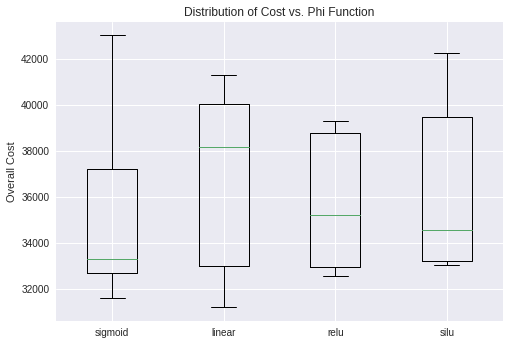

In [0]:
#visualize performance for different activation functions
plt.boxplot(phi_scores)
plt.xticks([1, 2, 3, 4], ['sigmoid', 'linear', 'relu','silu'])
plt.title("Distribution of Cost vs. Phi Function")
plt.ylabel("Overall Cost")
plt.show()

The sigmoid activation function achieved the lowest mean misclassification cost in this test set, but it also has high variance. While the relu activation function has the second lowest mean misclassification cost, it has the least variance of all the models. When comparing the relu and silu functions, it appears using relu is slightly better because the variance is smaller. It is difficult to pick a best model here. Regardless, the misclassification costs for all are over the threshold to be useful for realtors, so we would not recommend any of these models for deployment. 